<a href="https://colab.research.google.com/github/Ravimk07/Plant-disease-classification/blob/master/Tomato_Crop_iamge_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.getcwd()

'/content'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
/content/drive/My Drive/Disease Detection/Processed

In [0]:
PREPROCESSED_DATA_FOLDER= "/content/drive/My Drive/Disease Detection/Processed"

In [0]:
import glob
import ntpath
import cv2
import numpy as np

# CNN MODEL
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
images = []
classes = []

imgNone = 0
imgCnt = 0

for classFolderPath in os.listdir(PREPROCESSED_DATA_FOLDER):
    
    pattern = os.path.join(PREPROCESSED_DATA_FOLDER, classFolderPath, "*.JPG")
    
    for imagePath in glob.glob( pattern ):

        img = cv2.imread(imagePath, cv2.IMREAD_COLOR)
        
        # if the file contain any missig value ignore it
        if img is None:
            imgNone += 1
            continue
            
        imgCnt += 1
        
        images.append( img )
        classes.append(classFolderPath)

In [0]:
images = np.array(images)
classes = np.array(classes)
len(classes)

16020

In [0]:
# Label encoder
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
encodedLabels = enc.fit_transform(classes)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(images, encodedLabels, test_size=0.2, random_state = 42)

In [0]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:

EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/drive/My Drive/Disease Detection/Processed'
width=100
height=100
depth=3

In [0]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(classes)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [0]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 33, 33, 64)        0         
__________

In [0]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [0]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

Epoch 1/25
400/400 [==============================] - 54s 134ms/step - loss: 0.1870 - acc: 0.9362 - val_loss: 0.4404 - val_acc: 0.9089
Epoch 2/25
400/400 [==============================] - 46s 114ms/step - loss: 0.1143 - acc: 0.9585 - val_loss: 0.3137 - val_acc: 0.9125
Epoch 3/25
400/400 [==============================] - 45s 112ms/step - loss: 0.0917 - acc: 0.9662 - val_loss: 0.6522 - val_acc: 0.9061
Epoch 4/25
400/400 [==============================] - 44s 111ms/step - loss: 0.0794 - acc: 0.9702 - val_loss: 0.8873 - val_acc: 0.8877
Epoch 5/25
400/400 [==============================] - 44s 109ms/step - loss: 0.0765 - acc: 0.9718 - val_loss: 0.3106 - val_acc: 0.9238
Epoch 6/25
400/400 [==============================] - 44s 109ms/step - loss: 0.0609 - acc: 0.9768 - val_loss: 1.1809 - val_acc: 0.8782
Epoch 7/25
400/400 [==============================] - 45s 114ms/step - loss: 0.0605 - acc: 0.9777 - val_loss: 1.4024 - val_acc: 0.8580
Epoch 8/25
400/400 [==============================] - 4

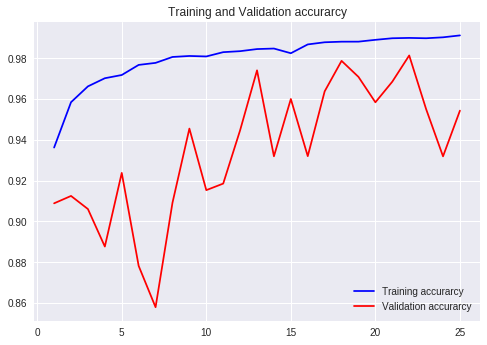

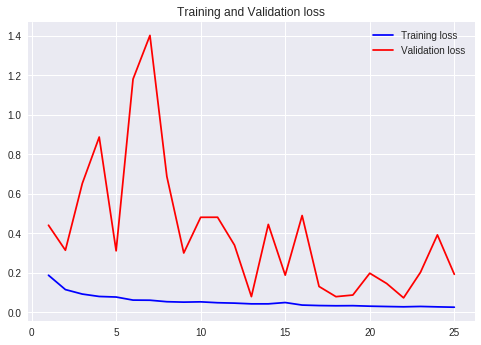

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [0]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
3204/3204 [==============================] - 2s 520us/step
Test Accuracy: 95.43383257665884


In [0]:
model.save('/content/drive/My Drive/Disease Detection/Processed/Train_model.h5') 

In [0]:

model.load_weights('/content/drive/My Drive/Disease Detection/Processed/Train_model.h5')

In [0]:
# Evaluation
score = model.evaluate(x_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
Predicted_classes = model.predict_classes(x_test)
wrong_preds = x_test[Predicted_classes != np.argmax(y_test)]
set(Predicted_classes)
i = 4
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

Test loss: 0.19174411102255037
Test accuracy: 0.9543383175439751
Predicted class: Tomato_Late_blight
Actual class: Tomato_Late_blight
